## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isnull().sum()
#Пропусков нет
# Количественные: duration, amount, age, 
# Бинарные: people_liable, telephone, foreign_worker, credit_risk
# Порядковые: status, savings, employment_duration, installment_rate, number_credits
# Категориальные: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
print(data[['amount', 'purpose']].groupby(['purpose']).mean())

                          amount
purpose                         
business             8209.333333
car (new)            5370.223301
car (used)           3066.983425
domestic appliances  2728.090909
furniture/equipment  2487.685714
others               3062.948718
radio/television     1498.000000
repairs              3180.400000
retraining           4158.041237
vacation             1205.888889


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
print(data[(data.age<30) & (data.housing =='rent')].shape[0]/data[data.age<30].shape[0])
print(data[(data.age>40) & (data.housing =='rent')].shape[0]/data[data.age>40].shape[0])

0.6666666666666666
0.6801470588235294


### Задание 5 (0.5 балла)

In [6]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
print(data[(data.foreign_worker == 'yes') & ((data.number_credits =='4-5') | (data.number_credits =='>= 6'))].shape[0])

1


### Задание 6 (1 балл)

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

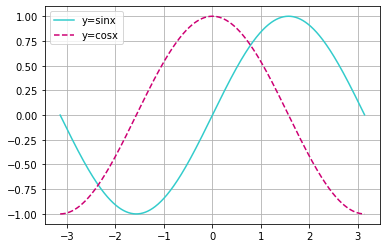

In [9]:
plt.plot(np.arange(-np.pi, np.pi, 0.01), np.sin(np.arange(-np.pi, np.pi, 0.01)), '#33CCCC', label='y=sinx')
plt.plot(np.arange(-np.pi, np.pi, 0.01), np.cos(np.arange(-np.pi, np.pi, 0.01)), '#CD0074', linestyle='dashed', label = 'y=cosx')
plt.grid()
plt.legend()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

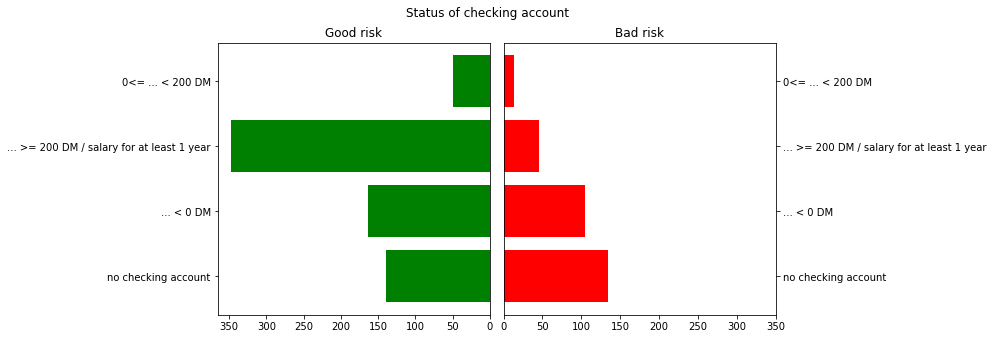

In [10]:
list_status = data.status.unique()
list_val_good = []
list_val_bad = []
for i in list_status:
    list_val_good.append(data.status[(data.status == i) & (data.credit_risk == 'good')].count())
    list_val_bad.append(data.status[(data.status == i) & (data.credit_risk == 'bad')].count())
fig, ax = plt.subplots(1, 2)
fig.suptitle('Status of checking account')
ax[0].barh(data.status.unique(), list_val_good, color='green')
ax[0].invert_xaxis()
ax[0].set_title('Good risk')
ax[1].barh(data.status.unique(), list_val_bad, color='red')
ax[1].set_title('Bad risk')
ax[1].yaxis.tick_right()
plt.xlim([0, 350])
fig.set_figwidth(10)
fig.set_figheight(5)
plt.subplots_adjust(wspace=0.05)
#Из графика видно, что наибольшее количество "плохих" улиентов относятся к категории "no checking account", в то время как в категории "... >= 200 DM / salary for at least 1 year" клиенты, в большинстве своем, хорошие 

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

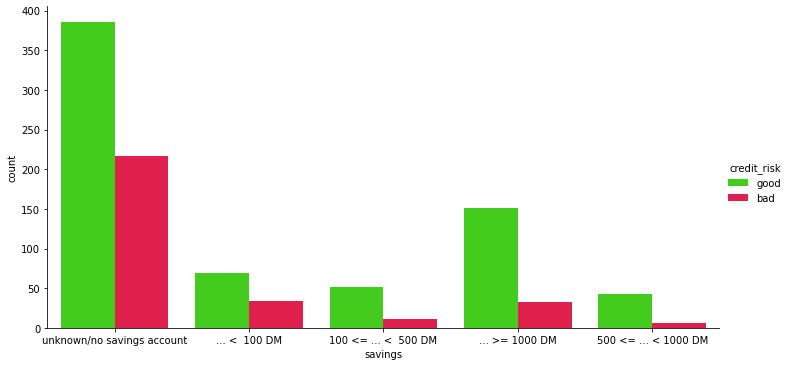

In [12]:
risk_dummy = [1] * 1000
data['count'] = risk_dummy.copy()
sns.catplot(x='savings', y='count', estimator=sum,hue='credit_risk', kind="bar", data=data, height=5, aspect=2, palette='prism')
#в категории "" находится большинство как "хороших" клиентов, так и "плохих" , в остальных категориях более значительное преобладание зеленого цвета

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

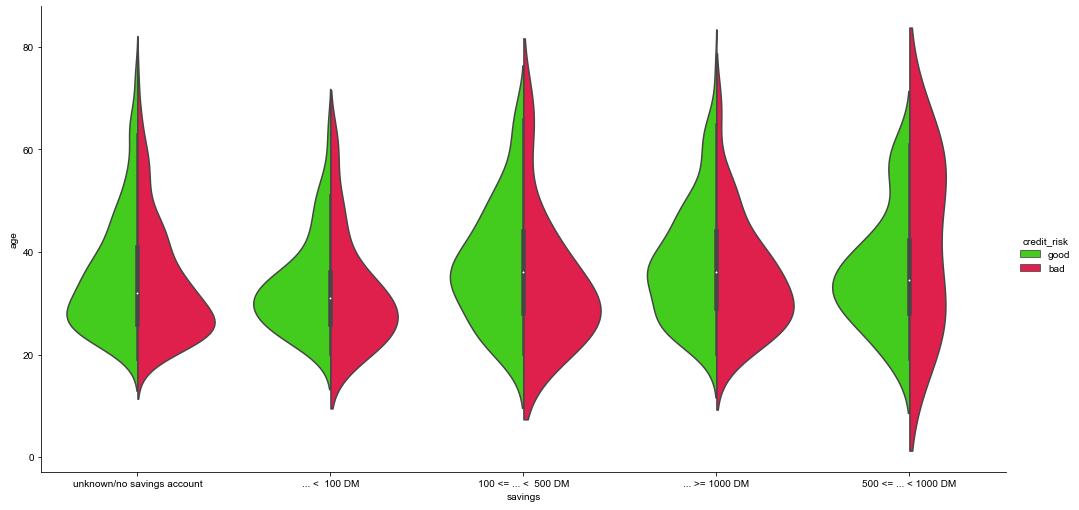

In [13]:
sns.catplot(x="savings", y="age", hue="credit_risk", kind="violin", split=True, data=data, height=7, aspect=2, palette='prism')
sns.set_style('white')
#Из графика видно, что в каждой категории наибольшее количество "хороших" клиентов приходится на возраст в диапазоне примерно от 25 до 40 лет

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

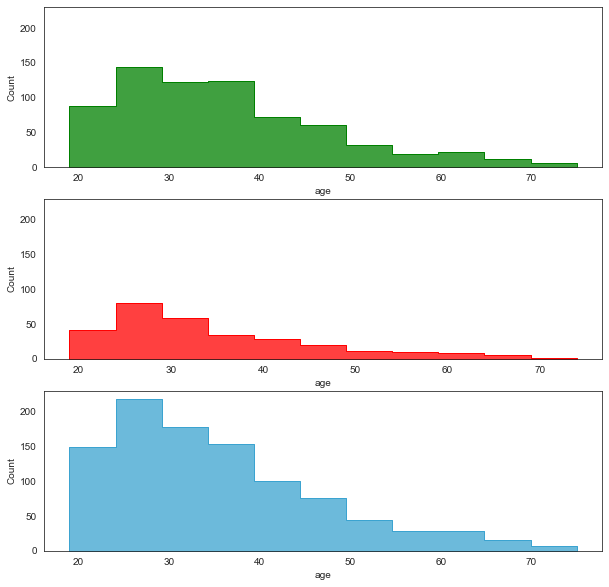

In [14]:
fig, ax = plt.subplots(3, 1)
sns.histplot(x=data.age[data.credit_risk=='good'], data=data, bins=11, color='g', element="step", ax=ax[0])
ax[0].set_ylim([0, 230])
sns.histplot(x=data.age[data.credit_risk=='bad'], data=data, bins=11, color='r', element="step", ax=ax[1])
ax[1].set_ylim([0, 230])
sns.histplot(x=data.age, data=data, palette='prism', bins=11, color='#3BA3D0', element="step", ax=ax[2])
ax[2].set_ylim([0, 230])
fig.set_figwidth(10)
fig.set_figheight(10)
#из данных графиков можно сделать вывод, что большинство клиентов находятся в возрасте от 25 до 40 лет, а количества положительных и отрицательных случаев имеют схожие распределения относительно возраста

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

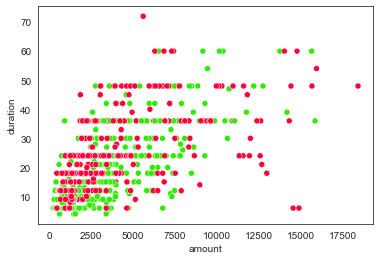

In [15]:
sns.scatterplot(data=data, x="amount", y="duration", hue='credit_risk', palette='prism', legend=False)
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
#По данному графику можно заметить, что при увеличении размера кредита увеличивается его средняя продолжительность, а также то, что достаточно большое количество красных точек сосредоточено в левом нижнем углу, то есть в условиях взятия небольших сумм на маленькие сроки

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

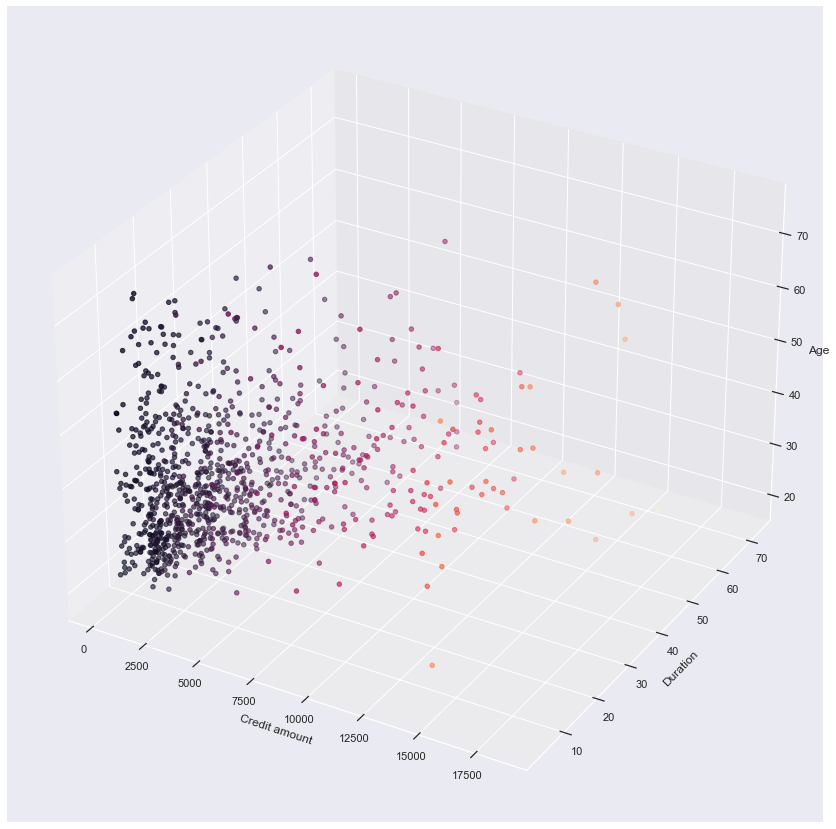

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=data['amount']
y=data['duration']
z=data['age']
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.scatter(x, y, z, c = x)
plt.show()
sns.set(rc={'figure.figsize':(15,15)})

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [18]:
data.people_liable = data.people_liable.apply(lambda x: 0 if x == '0 to 2' else 1)
data.telephone = data.telephone.apply(lambda x: 0 if x == 'no' else 1)
data.foreign_worker = data.foreign_worker.apply(lambda x: 0 if x == 'no' else 1)
data.credit_risk = data.credit_risk.apply(lambda x: 0 if x == 'bad' else 1)
data.status = data.status.apply(lambda x: 0 if x == 'no checking account' else (1 if x == '... < 0 DM' else (2 if x == '0<= ... < 200 DM' else 3)))
data.savings = data.savings.apply(lambda x: 0 if x == 'unknown/no savings account' else (1 if x == '... <  100 DM' else (2 if x == '100 <= ... <  500 DM' else (3 if x == '500 <= ... < 1000 DM' else 4))))
data.employment_duration = data.employment_duration.apply(lambda x: 0 if x == 'unemployed' else (1 if x == '< 1 yr' else (2 if x == '1 <= ... < 4 yrs' else (3 if x == '4 <= ... < 7 yrs' else 4))))
data.installment_rate = data.installment_rate.apply(lambda x: 0 if x == '< 20' else (1 if x == '20 <= ... < 25' else (2 if x == '25 <= ... < 35' else 3)))
data.number_credits = data.number_credits.apply(lambda x: 0 if x == '1' else (1 if x == '2-3' else (2 if x == '4-5' else 3)))
data.present_residence = data.present_residence.apply(lambda x: 0 if x == '< 1 yr' else (1 if x == '1 <= ... < 4 yrs' else (2 if x == '4 <= ... < 7 yrs' else 3)))
data = pd.get_dummies(data, columns=['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'])

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [41]:
def predict(Xtest: np.array) -> np.array:
    a = []
    for i in Xtest:
        ans = sum(i*koeff)
        if (ans > 0.26):
             ans = 1
        else:
             ans = 0
        a.append(ans)
    return a

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
F = data.corr()
F = F.credit_risk
koeff = F.drop('credit_risk')
data_norm =(data-data.min())/(data.max()-data.min())
X = data_norm.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

0.752